In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist, word_tokenize
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df1 = pd.read_csv("./data/news_cnn.csv")
df2 = pd.read_csv("./data/fox.csv")
df = pd.concat([df1,df2])
#df.dropna(inplace=True)

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

keyword            0
url                0
from               0
headline           5
body               6
body_word_count    0
date               0
dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

keyword            0
url                0
from               0
headline           0
body               0
body_word_count    0
date               0
dtype: int64


In [3]:
print(len(df1))
print(len(df2))

20002
9888


count    29879.000000
mean      1163.990595
std       2223.822919
min          4.000000
25%        450.000000
50%        733.000000
75%       1089.000000
max      51042.000000
Name: body_word_count, dtype: float64


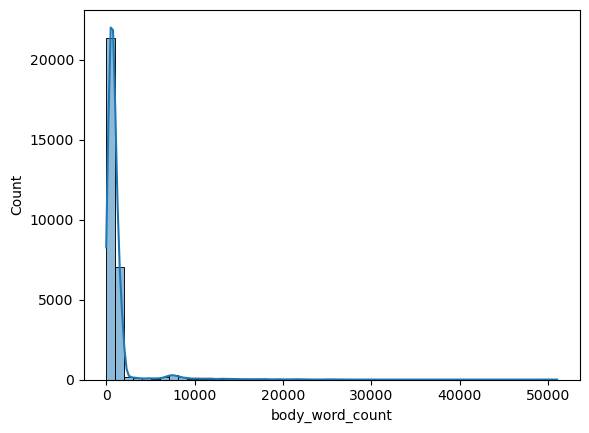

cnn    19991
fox     9888
Name: from, dtype: int64


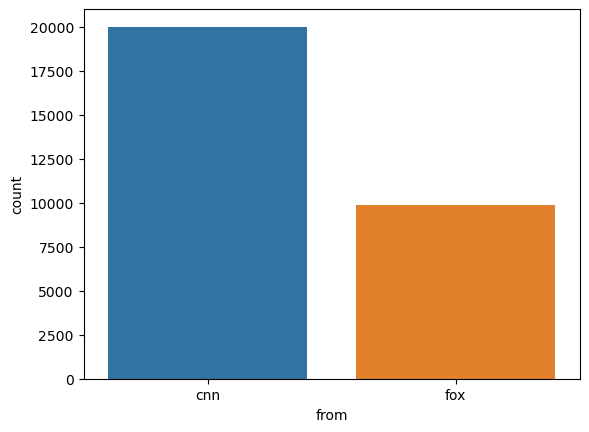

Climate change                             10770
Extreme weather                             3094
Environmental crisis                        1831
Renewable energy                            1796
Paris Agreement                             1709
Carbon emissions                            1587
Environmental policy                        1520
Sustainable development                     1492
Sea level rise                              1364
Greenhouse gases                            1026
Climate action                              1006
Climate policy                               969
Climate advocacy                             671
Climate science                              620
Climate adaptation                           214
Biodiversity loss                            148
COP26 (or other UN climate conferences)       54
COP15                                          8
Name: keyword, dtype: int64


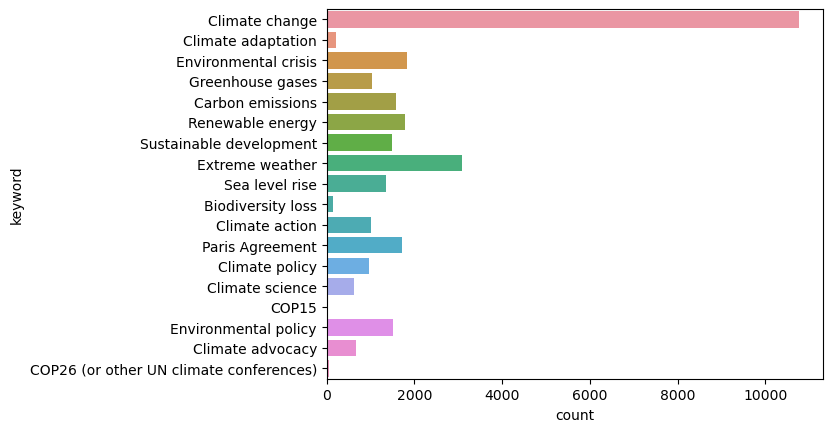

In [8]:
# Explore the data distribution
print(df['body_word_count'].describe())
sns.histplot(data=df, x='body_word_count', kde=True, bins=50)
plt.show()

# Explore the categorical variables
print(df['from'].value_counts())
sns.countplot(data=df, x='from')
plt.show()

print(df['keyword'].value_counts())
sns.countplot(data=df, y='keyword')
plt.show()



In [ ]:
#the two datasets are not balanced, so duplicate the fox dataset to balance 

In [24]:
import pandas as pd

# read in the CSV file and store it in a pandas dataframe
df = pd.read_csv('./data/fox.csv')

# duplicate the dataframe
df_dup = df.copy()

# merge the two dataframes vertically into a new one
merged_df = pd.concat([df, df_dup])

length = len(merged_df)
print(length)

# output the merged dataframe to a new file
merged_df.to_csv('./data/fox_balanced.csv', index=False)

19776


In [25]:
df1 = pd.read_csv("./data/news_cnn.csv")
df2 = pd.read_csv("./data/fox_balanced.csv")
df = pd.concat([df1,df2])
#df.dropna(inplace=True)
#deal with time
df['date'] = pd.to_datetime(df['date']).dt.year

count    39778.000000
mean      1091.154533
std       2059.335357
min          0.000000
25%        413.250000
50%        682.000000
75%       1020.000000
max      51042.000000
Name: body_word_count, dtype: float64


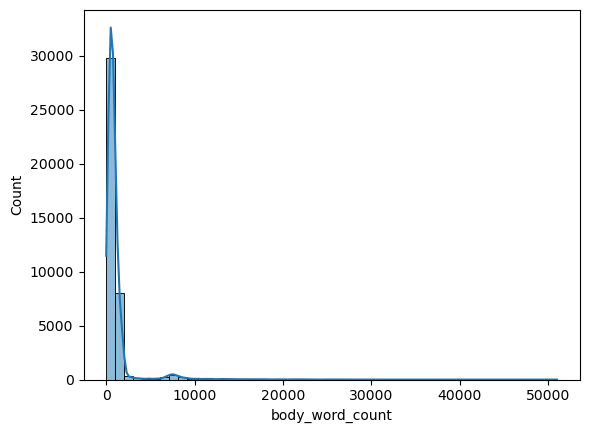

cnn    20002
fox    19776
Name: from, dtype: int64


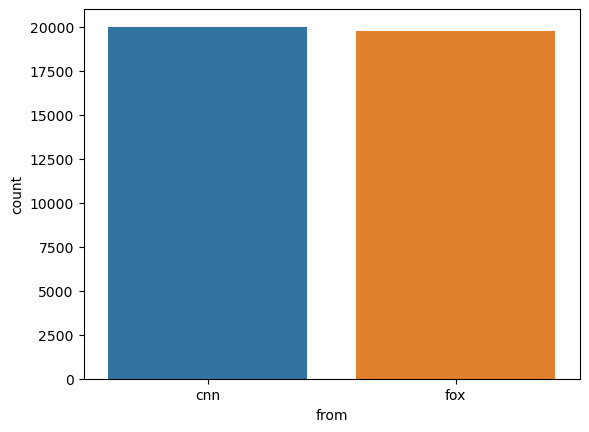

Climate change                             11873
Extreme weather                             4343
Renewable energy                            2748
Environmental crisis                        2599
Paris Agreement                             2579
Sea level rise                              2322
Carbon emissions                            2232
Environmental policy                        2173
Sustainable development                     2142
Greenhouse gases                            1824
Climate advocacy                            1284
Climate action                              1080
Climate policy                              1055
Climate science                              799
Climate adaptation                           372
Biodiversity loss                            230
COP26 (or other UN climate conferences)      108
COP15                                         15
Name: keyword, dtype: int64


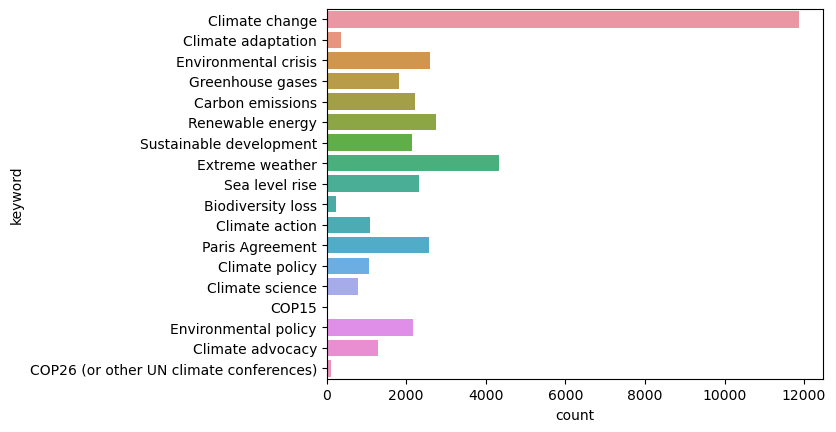

In [26]:
# Explore the data distribution
print(df['body_word_count'].describe())
sns.histplot(data=df, x='body_word_count', kde=True, bins=50)
plt.show()

# Explore the categorical variables
print(df['from'].value_counts())
sns.countplot(data=df, x='from')
plt.show()

print(df['keyword'].value_counts())
sns.countplot(data=df, y='keyword')
plt.show()


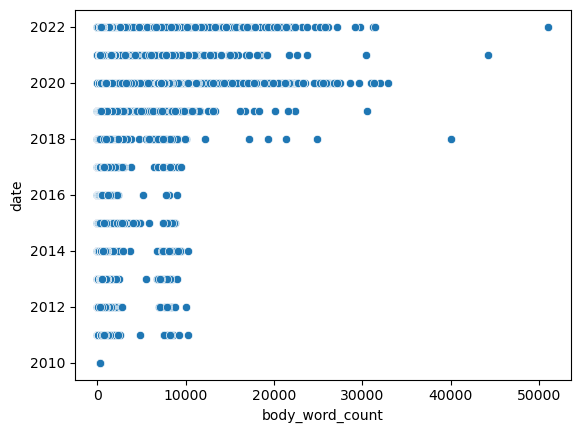

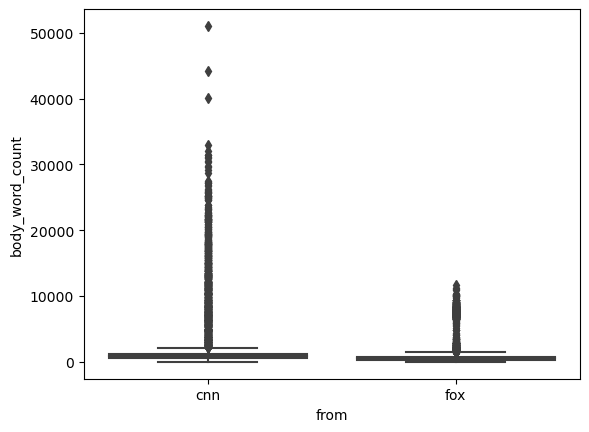

In [11]:
# Identify the relationships between variables
sns.scatterplot(data=df, x='body_word_count', y='date')
plt.show()

sns.boxplot(data=df, x='from', y='body_word_count')
plt.show()

In [13]:
# Check for duplicated data
print(df.duplicated().sum())

0


Settle in with these weekend reads                                                                                                    23
The latest on the coronavirus pandemic                                                                                                17
Coronavirus pandemic in the US                                                                                                        15
The week in politics                                                                                                                  15
Quickly catch up on the day's news                                                                                                    14
                                                                                                                                      ..
Malawi's landscape is clogged with plastic waste that could linger for 100 years. One woman has taken on plastic companies and won     1
China says radiation levels are normal ar

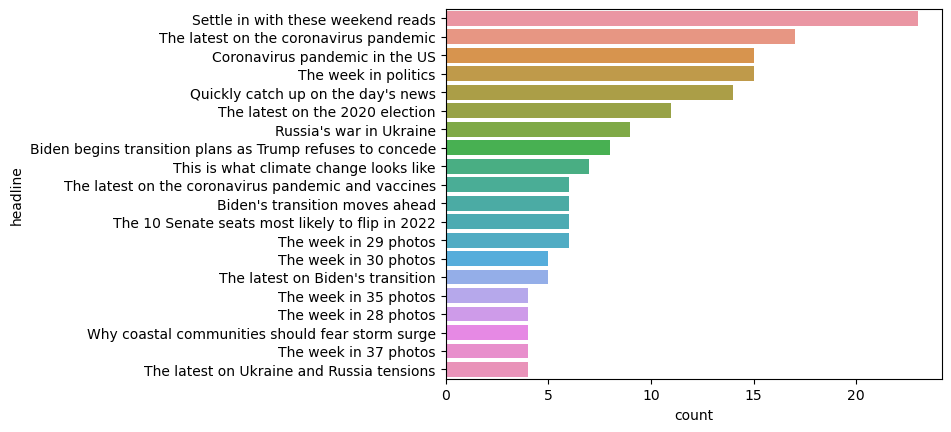

In [14]:
# Explore the data distribution of the `headline` variable
print(df['headline'].value_counts())
sns.countplot(data=df, y='headline', order=df['headline'].value_counts().iloc[:20].index)
plt.show()

Climate change                             10770
Extreme weather                             3094
Environmental crisis                        1831
Renewable energy                            1796
Paris Agreement                             1709
Carbon emissions                            1587
Environmental policy                        1520
Sustainable development                     1492
Sea level rise                              1364
Greenhouse gases                            1026
Climate action                              1006
Climate policy                               969
Climate advocacy                             671
Climate science                              620
Climate adaptation                           214
Biodiversity loss                            148
COP26 (or other UN climate conferences)       54
COP15                                          8
Name: keyword, dtype: int64


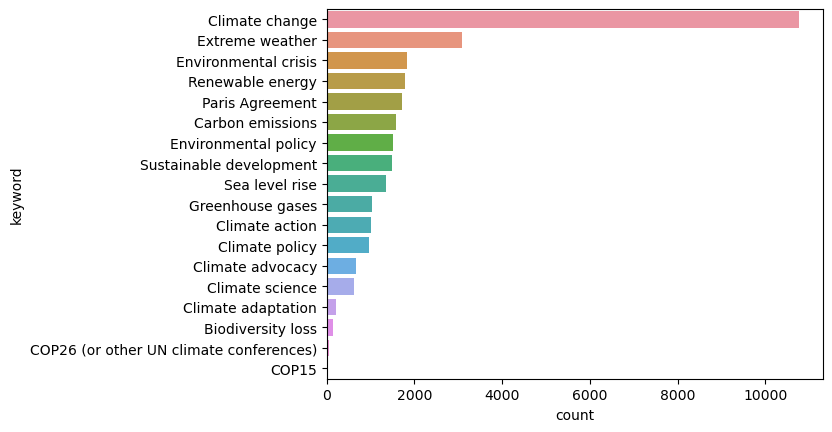

In [15]:
# Explore the data distribution of the `keyword` variable
print(df['keyword'].value_counts())
sns.countplot(data=df, y='keyword', order=df['keyword'].value_counts().iloc[:20].index)
plt.show()

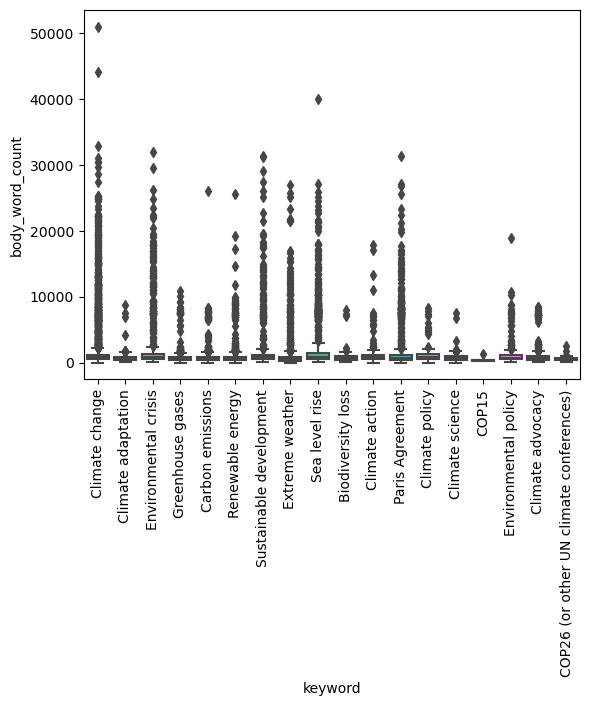

In [4]:
# Identify the relationships between the `body_word_count` and `keyword` variables
sns.boxplot(data=df, x='keyword', y='body_word_count')
plt.xticks(rotation=90)
plt.show()